In [2]:
import os
import pandas as pd

from modelclass import model
from modelinvert import targets_instruments

# Load and run
The model and baseline run has been saved in [here](Corona%20specify%20model%20and%20make%20eksperiments.ipynb)

In [5]:
mcorona,df  = model.modelload('coronatest.json')  # Get the model and data
df.index = df.index-100                           # rebase the days, so we calibrate at time 0
df.index.name = 'Day'
res = mcorona(df,keep='Basis',silent=1)           # run the baseline 

# The impact of a change "the probability of transmision"


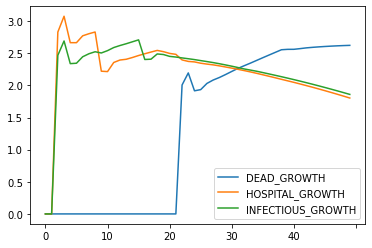

In [6]:
ti = targets_instruments(databank=res,model=mcorona,
                         targets=['DEAD_GROWTH','HOSPITAL_GROWTH','INFECTIOUS_GROWTH'],
                         instruments= [('PROBABILITY_TRANSMISION',0.01)])
over_delay = pd.concat([ti.jacobi(0,delay=d).rename(columns=lambda x:f'{d}') for d in range(50)],axis=1).T
over_delay.plot()

#%%

In [ ]:
def ti_calibrate(mmodel,instrument,target,value,time,delay=0,silent=1,show=1):
    mmodel.keep_solutions,old_keep_solutions= {},mmodel.keep_solutions
    mmodel.keep_solutions['Before calibration'] = mmodel.lastdf.copy(deep=True)
    
    targetdf=pd.DataFrame(value,index=[time],columns=[target])
    ti = targets_instruments(databank=mmodel.lastdf,model=mmodel,targets=targetdf,instruments= [instrument])
    
    res = ti(mmodel.lastdf,delay=delay,silent=1,debug=1)
    res2 = mmodel(res,silent=silent,keep='After calibration')
    if show:
        figs = mcorona.keep_plot(f'{instrument[0]} {target}',diff=0,legend=0,dec='2',showtype='level',scale='linear');
        mmodel.keep_add_vline(figs,time=time)          
    mmodel.keep_solutions,model_calibrate_keep_solutions =  old_keep_solutions,mmodel.keep_solutions
    return res2

# 

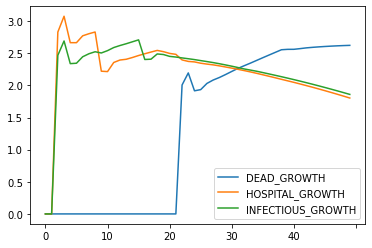

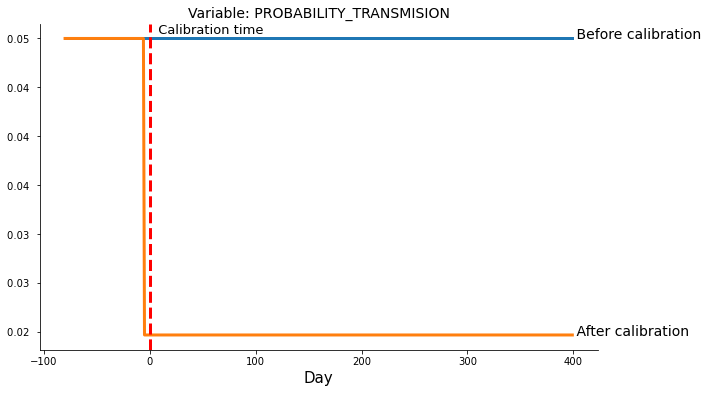

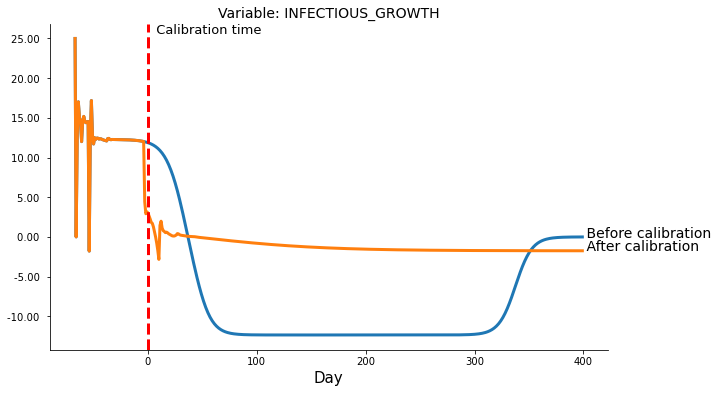

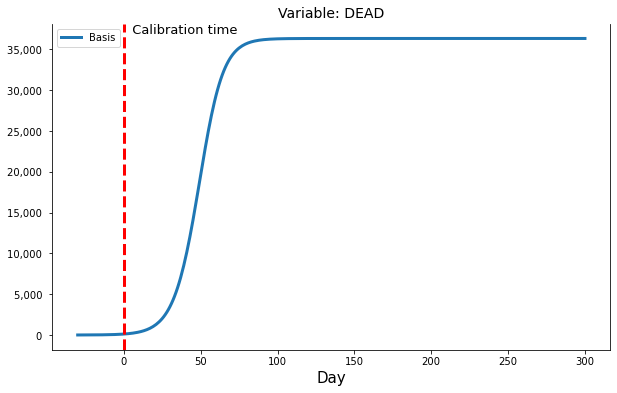

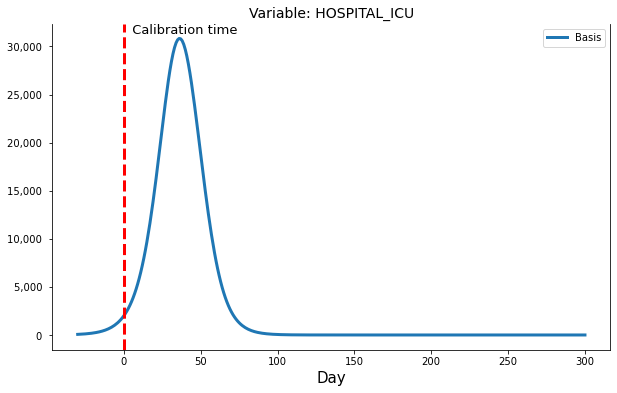

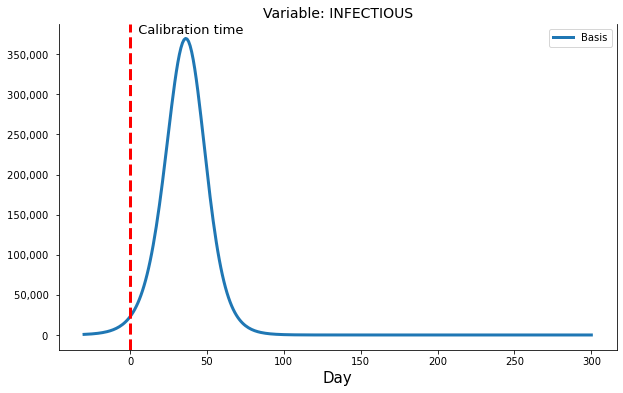

In [1]:
time = 0
delay = 5 
res = mcorona(df,keep='Basis',silent=1)
res2 = ti_calibrate(mcorona,instrument = ('PROBABILITY_TRANSMISION',0.01),
                    target = 'INFECTIOUS_GROWTH',value=3,time=time,delay=delay)
#%%
with mcorona.set_smpl(-30,300):
      figs = mcorona.keep_plot('dead hospital_icu infectious',diff=0,legend=1,dec='0',
                                        showtype='level',scale='linear');
      mcorona.keep_add_vline(figs,time=time)